In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


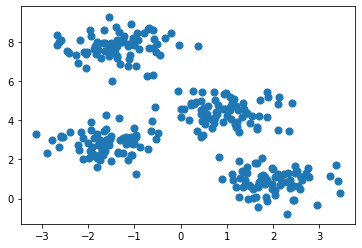

In [2]:
#For blobs
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1], s = 50)

In [3]:
#KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [4]:
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

In [5]:
X.shape #300 rows and 2 coloumns i.e x and y pts

(300, 2)

In [6]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

In [7]:
X.shape[0]

300

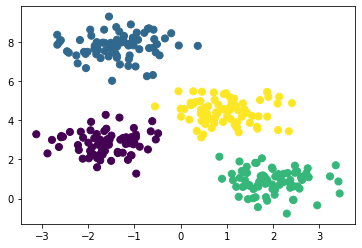

In [8]:
#Creating a fxn to perform all the steps from randomly assigning centroids to convergence
from sklearn.metrics import pairwise_distances_argmin #calculates dist betn 2 pair of pts

def find_clusters(X, n_clusters, rseed = 2):
    #1.Randomly choosing clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #2.Assign labels based on closest distance
        labels = pairwise_distances_argmin(X, centers)
        
        #3.Find new centers for means of pts
        new_centers = np.array([X[labels == i].mean(0)
                                for  i in range(n_clusters)])
        
        #4.Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers,labels
centers,labels = find_clusters(X,4)
plt.scatter(X[:,0], X[:,1], c = y_kmeans, s = 50, cmap= 'viridis')
        


In [9]:
#Examples for converting 16-million clrs image to 16 clrs image only

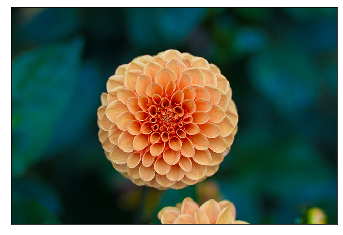

In [10]:
from sklearn.datasets import load_sample_image
flower = load_sample_image('flower.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(flower)

In [11]:
#Dimensions of array
flower.shape

(427, 640, 3)

In [12]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [13]:
#Rescaling the clr between 0 and 1
data = flower/255.0
#And reshaping it to (n_samples*n_features)
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [14]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [21]:
#Visualizing the pixels in clr space, using a subset of 10000 pixels for efficiency
def plot_pixels(data, title, colors = None, N = 10000): #Random set of 10000 pts
    if colors is None:
        colors = data
        
    #Choosing a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G,color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim =(0,1), ylim = (0,1))
    
    ax[1].scatter(R,B,color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim =(0,1), ylim = (0,1))
    
    fig.suptitle(title, size = 20)
    

    

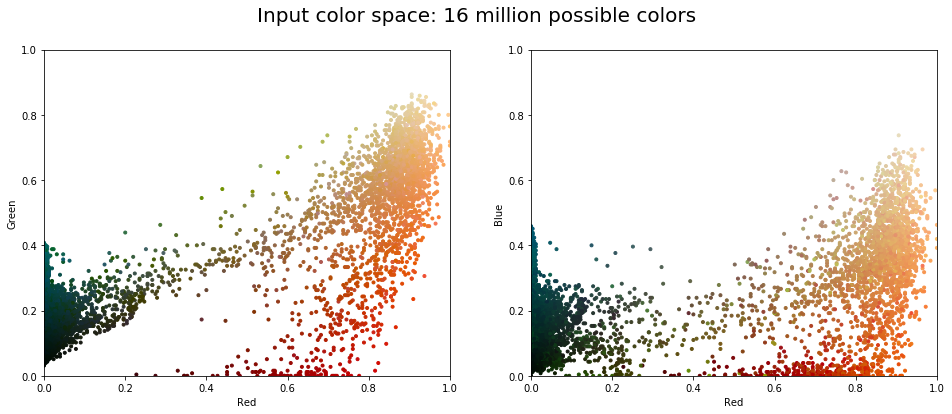

In [27]:
plot_pixels(data, title='Input color space: 16 million possible colors')


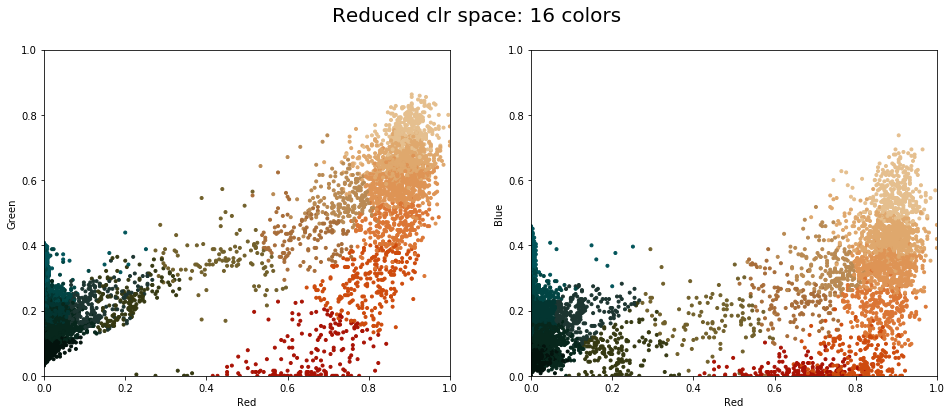

In [28]:
import warnings; warnings.simplefilter('ignore')

#Here we will reduce the 16 million clr to only 16 clrs
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced clr space: 16 colors' )

Text(0.5, 1.0, '16-color image')

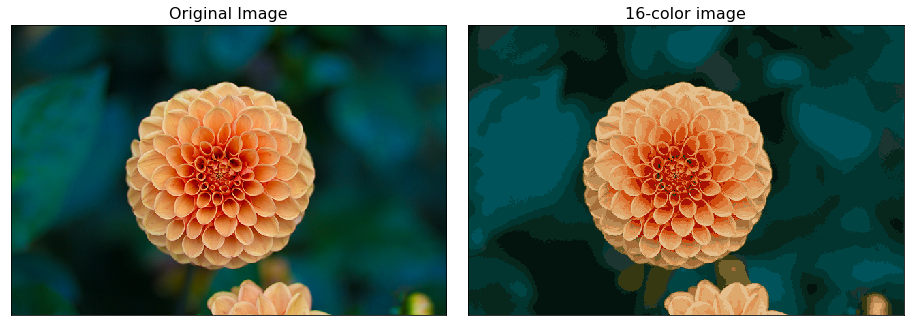

In [32]:
#Displaying flower with only 16 colors
flower_recolored = new_colors.reshape(flower.shape)

fig, ax  = plt.subplots(1,2,figsize = (16,6), subplot_kw = dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image',size = 16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color image',size = 16)


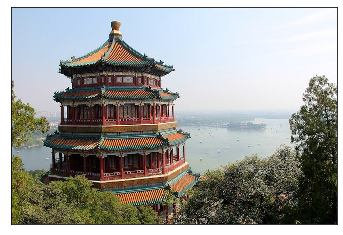

In [33]:
#One more example
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks = [], yticks = [])
ax.imshow(china)

In [42]:
#Rescaling the clr between 0 and 1
data = china/255.0
#And reshaping it to (n_samples*n_features)
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [46]:
#Visualizing the pixels in clr space, using a subset of 10000 pixels for efficiency
def plot_pixels(data, title, colors = None, N = 10000): #Random set of 10000 pts
    if colors is None:
        colors = data
        
    #Choosing a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G,color = colors, marker = '.')
    ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim =(0,1), ylim = (0,1))
    
    ax[1].scatter(R,B,color = colors, marker = '.')
    ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim =(0,1), ylim = (0,1))
    
    fig.suptitle(title, size = 20)
    

    

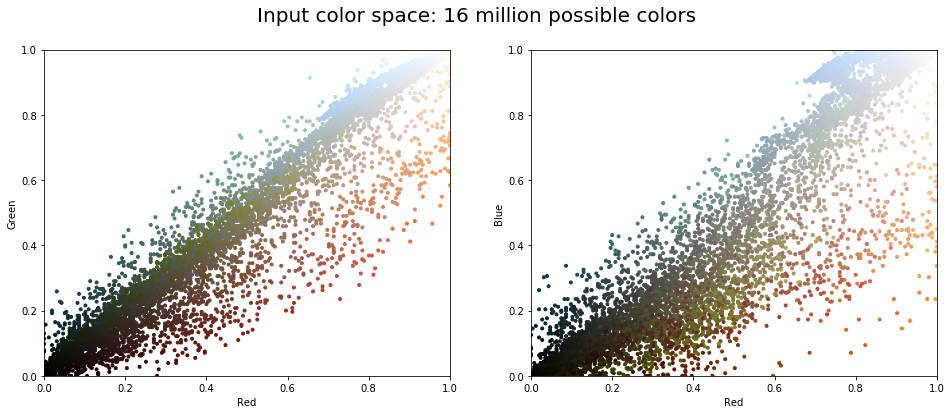

In [47]:
plot_pixels(data, title='Input color space: 16 million possible colors')


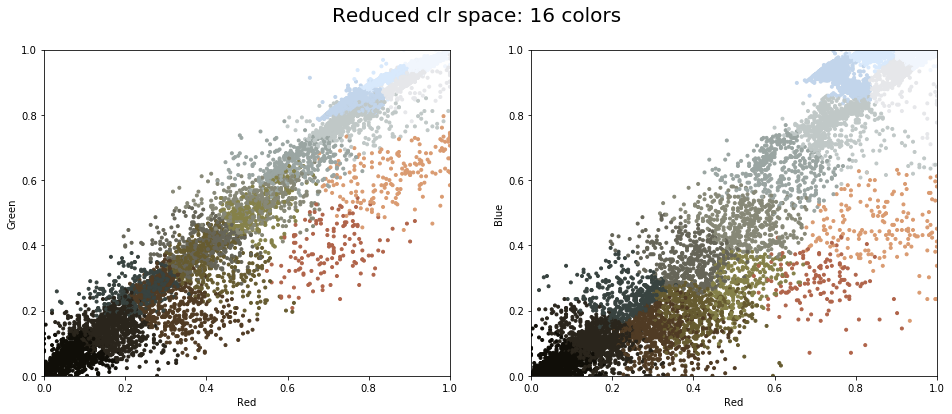

In [48]:
import warnings; warnings.simplefilter('ignore')

#Here we will reduce the 16 million clr to only 16 clrs
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced clr space: 16 colors' )

Text(0.5, 1.0, '16-color image')

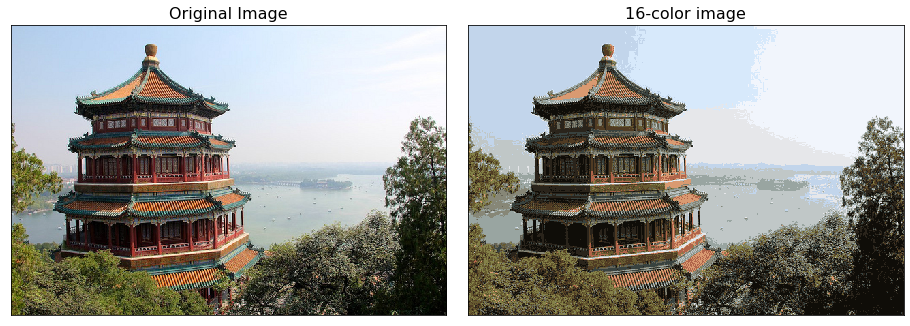

In [50]:
#Displaying flower with only 16 colors
china_recolored = new_colors.reshape(china.shape)

fig, ax  = plt.subplots(1,2,figsize = (16,6), subplot_kw = dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image',size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color image',size = 16)
